### Capstone 2: narrative analytics and experimentation

The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

* Analysis that highlights your experimental hypothesis.
* A rollout plan showing how you would implement and rollout the experiment
* An evaluation plan showing what constitutes success in this experiment

Your experiment should be as real as possible. Though you obviously will not have access to the full production environment to deploy your experiment, it should be feasible and of interest to the parties involved with your actual data source.

The target size of your research proposal should be 3-5 pages.


### The problem

Traffic accidents claims nearly 1.25 million people each year, on average 3,287 deaths a day.
An additional 20-50 million people are injured or disabled by traffic accidents. Traffic crimes include traffic accidents, hit and run, running stop signs, running yellow and red lights, Z walking and others.

What can be done to reduce the number of traffic crimes? Will people less likely to engage in traffic crimes if they knew there are consequences?

The data related to Traffic crimes interested me because these crimes can be reduced if the message of caution and consequences can be provided to people. Traffic crimes mostly happens due to people not paying attention. For example, accidents can happen due to people talking or texting on the phone and not having their eyes on the road. 
Crimes such as hit and run happens becuase people think that if they just run away from the scence no one will see them and they can get away from the crime.

The place chosen for this is Denver. The data that motivates this experience is the Kaggle data on "Denver Crime Data". The Data provides all crimes committed in the Denver area. 


#### Solution

This experiment will test to see if installing traffic cameras in certain high traffic accidents areas will reduce the number of traffic related crimes in those areas. 


### Analysis that highlights your experimental hypothesis





In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

#### Exploring the data

In [6]:
#PATH = 'dataset/train.csv'
PATH = 'dataset/crime.csv'
experiment_data = pd.read_csv(PATH)

experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523397 entries, 0 to 523396
Data columns (total 19 columns):
INCIDENT_ID               523397 non-null int64
OFFENSE_ID                523397 non-null int64
OFFENSE_CODE              523397 non-null int64
OFFENSE_CODE_EXTENSION    523397 non-null int64
OFFENSE_TYPE_ID           523397 non-null object
OFFENSE_CATEGORY_ID       523397 non-null object
FIRST_OCCURRENCE_DATE     523397 non-null object
LAST_OCCURRENCE_DATE      165849 non-null object
REPORTED_DATE             523397 non-null object
INCIDENT_ADDRESS          472298 non-null object
GEO_X                     519057 non-null float64
GEO_Y                     519057 non-null float64
GEO_LON                   519057 non-null float64
GEO_LAT                   519057 non-null float64
DISTRICT_ID               523397 non-null int64
PRECINCT_ID               523397 non-null int64
NEIGHBORHOOD_ID           523397 non-null object
IS_CRIME                  523397 non-null int64
IS_TRAFFIC

In [7]:
experiment_data.head(10)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,1/26/2018 12:24:00 PM,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,1/30/2018 10:33:00 AM,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0
8,201870833,201870833540100,5401,0,traffic-accident-hit-and-run,traffic-accident,1/30/2018 9:10:00 AM,NaN,1/30/2018 9:17:00 AM,W 13TH AVE / N CHEROKEE ST,3142965.0,1693682.0,-104.991650,39.736863,6,611,civic-center,0,1
9,20186001048,20186001048230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/31/2018 12:55:00 AM,1/31/2018 6:55:00 AM,1/31/2018 7:07:00 AM,2828 N ZUNI ST,3136231.0,1701209.0,-105.015451,39.757627,1,113,highland,1,0


In [38]:
#check for missing data, and output columns that have missing data
for col in experiment_data:
    if(experiment_data[col].isnull().any()):
        print(col)

LAST_OCCURRENCE_DATE
INCIDENT_ADDRESS
GEO_X
GEO_Y
GEO_LON
GEO_LAT


In [8]:
# Remove the 
data = experiment_data.filter(['OFFENSE_TYPE_ID','OFFENSE_CATEGORY_ID','FIRST_OCCURRENCE_DATE',
                               'LAST_OCCURRENCE_DATE','REPORTED_DATE',
                               'IS_TRAFFIC','IS_CRIME','PRECINCT_ID','DISTRICT_ID','NEIGHBORHOOD_ID'])

In [40]:
data.head(5)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,IS_TRAFFIC,IS_CRIME,PRECINCT_ID,DISTRICT_ID,NEIGHBORHOOD_ID
0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,0,1,521,5,montbello
1,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,0,1,522,5,gateway-green-valley-ranch
2,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,0,1,314,3,wellshire
3,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,0,1,312,3,belcaro
4,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,0,1,311,3,cherry-creek
...,...,...,...,...,...,...,...,...,...,...
523392,harassment-sexual-in-nature,public-disorder,8/30/2019 12:00:00 PM,10/18/2019 12:00:00 PM,10/21/2019 6:00:00 PM,0,1,623,6,capitol-hill
523393,traffic-accident,traffic-accident,10/21/2019 12:50:00 PM,NaN,10/21/2019 12:50:00 PM,1,0,324,3,hampden-south
523394,threats-to-injure,public-disorder,10/20/2019 9:00:00 AM,NaN,10/20/2019 9:44:00 AM,0,1,221,2,northeast-park-hill
523395,aggravated-assault,aggravated-assault,10/21/2019 12:35:00 PM,NaN,10/21/2019 1:46:00 PM,0,1,211,2,whittier


#### total number of rows

523397 rows × 10 columns

#### how many offerences are related to traffic? 

136470

#### what districts are they? 

3,1,2,6,4,5,7 from high to low


#### what PRECINCT_ID are they?



### Experiemental Hypothesis


#### Null hypothesis

Installing cameras at traffic light in certain precient does not decrease the amount of traffic accidents
(there is no need for a percentage since you are going to see if there is a significant difference)

#### Hypothesis

Installing cameras at traffic light in certain districts does decrease the amount of traffic accidents 


#### Key metric



In [41]:
# let's see how many observations we have in each group
print(data.groupby("IS_TRAFFIC")["IS_TRAFFIC"].count())

IS_TRAFFIC
0    386927
1    136470
Name: IS_TRAFFIC, dtype: int64


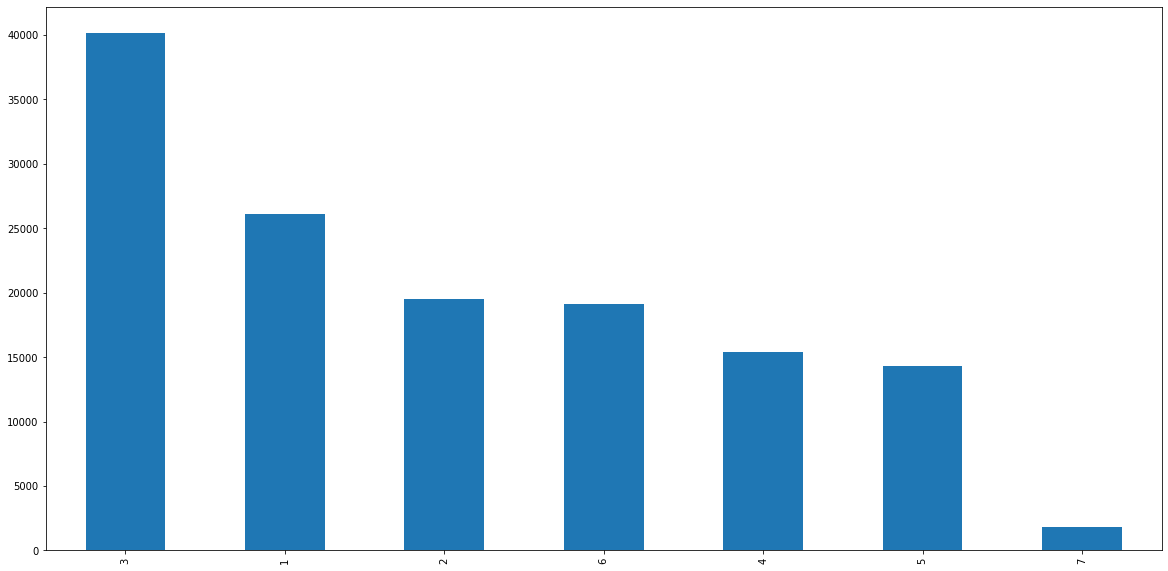

In [12]:
#### FIGURE 1
# which district has the highest traffic accidents
data[data.IS_TRAFFIC == 1].DISTRICT_ID.value_counts().plot(kind='bar',figsize=(20,10))

In [10]:
data.PRECINCT_ID.unique()

array([521, 522, 314, 312, 311, 622, 122, 611, 113, 323, 422, 121, 321,
       123, 511, 512, 211, 212, 324, 759, 313, 423, 523, 411, 322, 111,
       222, 412, 421, 612, 621, 112, 223, 213, 623, 221])

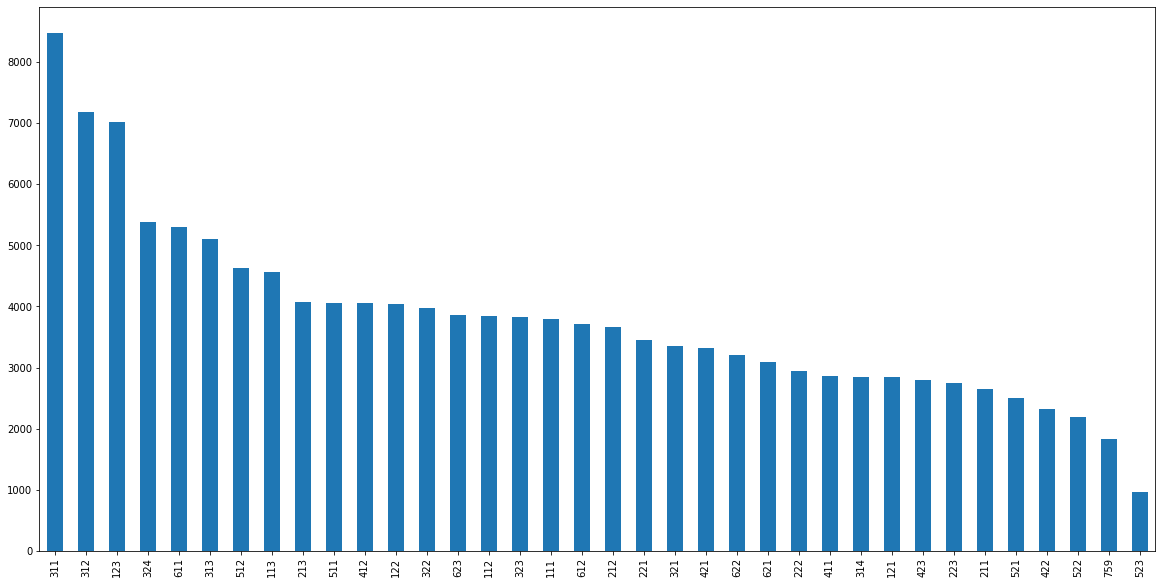

In [11]:
### FIGURE 2
# which precinct has the highest traffic accidents
data[data.IS_TRAFFIC == 1].PRECINCT_ID.value_counts().plot(kind='bar',figsize=(20,10))


### A rollout plan showing how you would implement and rollout the experiment

From analysis of the data, we found that it would be interesting to see where the traffic crimes takes place. So first I started with something small. we looked at 

"How does the number of traffic crime looks like in each district?"

Figure 1 shows us how the number of traffic crimes look like for each districts. But it seems like the districts are making the data too narrow. What that means is if we wanted to run the experiment by installing cameras, we have to consider that within each districts there are many precints and within each precints there are many traffic crimes. So if we consider just the districts, we will not have enough data to compare. 

Therefore, lets look at the traffic crimes by precint. Figure 2 shows us the number of traffic crimes by precints. This data looks much better. Within each precint, we can see the number of traffic crimes that are commited. so if we consider x number of precints, we can have the total number of traffic crimes. 

This will also give us enough data to get a mean for the traffic accidents. Now we would divide the precint into Group A and Group B. Group A is the test group where cameras are instralled. Group B is the group where no cameras are installed. The way the division worked would be take every 3rd precint from the plot seen above and use that every 3rd one to be in the sample group A. So Group A would be 1st, 4th, 7th and so on upto 10 precints). We will stop at 10 since we belive that its enough data to run this experiement.

Group B will have the rest of the precints (all precints from the plot that are not in Group A). When choosing the precint to be in group A and B, it was necessary not to choose the high traffic crime areas and put them in one group. Therefore, every 3rd district from the plot was chosen to be in the sample group.

Group A (the test group) will have cameras installed in major traffic lights and intersections, as well as at STOP signs that are in heavy traffic areas. Group B will stay as is with no cameras or any changes to different traffic crime areas. 

Data will be collected from both group A and B for one year. This is because we want to see if weather, winter season and holidays will have any effect on our experiement or not. This will also give us enough time for people to know that there are cameras installed and be aware of that as well. 

While data is being collected, we should do some calaculations to set some baseline so we can compare our data with our experiemental data. The way to do is as follows:

We look at the exisiting data before any cameras are installed. We take the data and come up with the number of traffic crimes commited in each precint. The we take the precint that we considered to be in Group A, we calaculte the number of traffic crimes in total for all of those precint for Group A.

Let's say without installing any cameras, the total number of traffic crime in Group A precints together is X


We do the same with Group B traffic crime data. Let's say WITHOUT installing any traffic cameras in Group B precints, the total number of traffic crimes in Group B is Y

The we setup the experiment as we described above. 

We collect data for one year. After a year, we calculate the the total number of traffic crime in Group A precints (one with the cameras). Let's call this number M.

We collect data from Group B. We get the total number of traffic crimes from Group B. Let's call this number N.

Now its time to calculations. We do this as follows: 

DifferenceA = mean(X-M), lets call this mean_group_a
DifferenceB = mean(Y-N), lets call this mean_group_b

Then we run the t-test to see the significance of the sample and the population. The purpose of t-test will be to see if null hypothsis holds or not. T-test will also show us if there are significant differerence between the sample and the population helping us determine if the experiment is a success or not.

t-test(mean_group_a, mean_group_b). 



### An evaluation plan showing what constitutes success in this experiment

There is a primary success metric that will determine the success of this experiement. That is if the t-test shows significant difference in the sample and population. This will tell us that installing camera made a significant difference.

To find if that significance is related to null hypothesis, we have look at the p-value. The p-value that we get form the t-test, if p<0.05 then we reject the null hypothsis menaing that if p<0.05, then the data tells us that installing camera did reduce the traffic crime in those areas. 

In addition to the primary metrics, we shoudl also consider some secondary success metric. Since we have the groups setup and we are collecting the same data as the data that we were collecting before the experiement, it will be interesting to look at the "IS_CRIME" feature. In the similar fashion as above, we should look at how the number of crime rates look for Group A and Group B. Does intalling cameras decreased the number of "Other" crimes in those areas?


In [ ]:
# There is difference in pricing based on neighborhood - 

#Number of reviews
#- collection of data
#- A - 4,5     B - 1,2,3
#- ones that are higer rating will be renting more?
#- some areas are not rented often 
#- if we put safety in place, then maybe they will have more rentals

#del experiment_data['amenities','thumbnail_url','host_has_profile_pic','host_identity_verified']
#del experiment_data['thumbnail_url']
#del experiment_data['longitude']
#del experiment_data['latitude']